In [1]:
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Lambda, Dense, Flatten
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "chest_xray/val",
    image_size = (224,224)
)

Found 16 files belonging to 2 classes.


In [3]:
vgg = VGG16(input_shape=[224,224] + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [4]:
model.load_weights('training_1/cp.ckpt')

In [5]:
class_names = ['NORMAL', 'PNEUMONIA']

In [6]:
def predict(model, img):
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_data = preprocess_input(img_array)

    predictions = model.predict(img_data)
    predicted_class = class_names[np.argmax(predictions[0])]
    return predicted_class

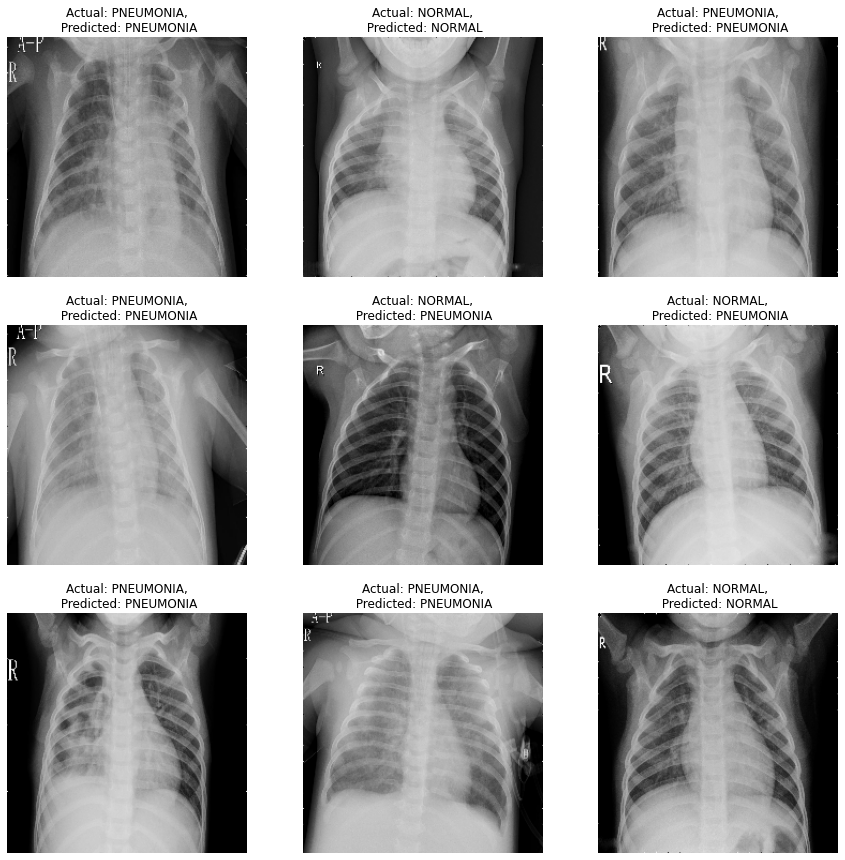

In [7]:
plt.figure(figsize=(15, 15))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")
        
        plt.axis("off")